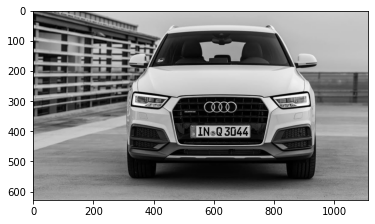

In [1]:
import cv2
from matplotlib import pyplot as plt
import imutils
import easyocr
import numpy as np

img = cv2.imread('image1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

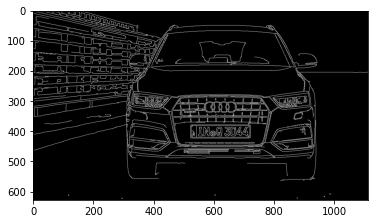

In [2]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged =cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [3]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [4]:
location =None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location =approx
        break

In [5]:
location

array([[[542, 383]],

       [[717, 382]],

       [[719, 418]],

       [[543, 420]]], dtype=int32)

In [6]:
mask = np.zeros(gray.shape, np.uint8)
new_image =cv2.drawContours(mask, [location], 0 ,255, -1)
new_image= cv2.bitwise_and(img, img, mask=mask)


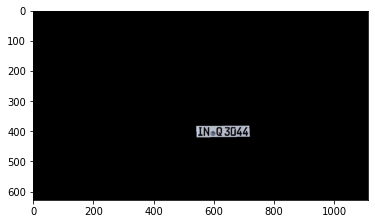

In [7]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [8]:
(x,y) =np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image =gray[x1:x2+1, y1:y2+1]

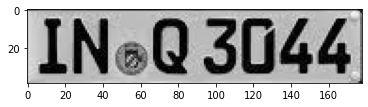

In [9]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [10]:
reader= easyocr.Reader(['en'])
result =reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[3, 0], [51, 0], [51, 39], [3, 39]], 'IN', 0.9992336034588203),
 ([[63, 0], [177, 0], [177, 39], [63, 39]], 'Q3044', 0.9927082498966414)]

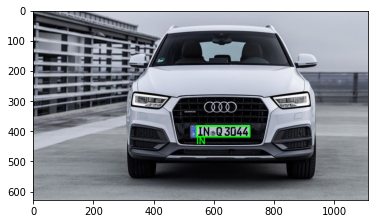

In [14]:
text =result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res =cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res= cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))